# Regression Linear Model III: Lasso 

In this notebook we study the Lasso regularization for linear model for regression. We will follow closely the other notebooks where we study linear models and therefore we will start with the theoretical background giving the details of how it works in theory. Again, we will use the notation we already set in the introductionary file for Supervised Learning (Supervised_Learning.ipynb). This notebook is structured as follows

- [Theoretical Analysis:](#s1)
    - [Algorithm](#s1.1)
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

##  <a class="anchor" id='s1'>Theoretical Analysis</a> 

Lasso linear regression is a regularization method for OLS linear regression. There are basically two main reasons why we are often not satisfied with the OLS estimates: 

- The first is _prediction accuracy_: the least squares estimates often have low bias but large variance. Prediction accuracy can sometimes be improved by shrinking or setting some coefficients to zero. By doing so we sacrifice a little bit of bias to reduce the variance of the predicted values, and hence may improve the overall prediction accuracy

- The second reason is _interpretation_. With a large number of predictors, we often would like to determine a smaller subset that exhibit the strongest effects. In order to get the “big picture,” we are willing to sacrifice some of the small details


The regularization methods get into the game in general when our OLS model is too complex for modelising the real dataset. That it means, for example, that among all the features we have, some of them suffers from multi-collinearity. In general, in more mathematical terms, regularization method are used when $p>N$ that makes the matrix $X^TX$ not invertible.




Similarly to the case of the OLS linear model we have to minimize a risk function such that our predicted model will be

\begin{align*}
\mathcal{R}(f)=E\left[L(f(x),y)\right]=\int L(f(x),y)dP(x,y)
\end{align*}

where $L(f(x),y)$ is the  loss function and $P(x,y)$ is the joint probability distribution.  The ultimate goal of a learning algorithm is to find a function $\hat{f}$ for which the risk $\mathcal{R}(\hat{f})$ is minimal, among the fixed class of function $\mathcal{H}$:

\begin{align*}
\hat{f}=\arg\min_{f\in\mathcal{H}} \mathcal{R}(f)
\end{align*}

Since the statistician cannot compute the expectation (and thus the risk) because he does not know the distribution $P(x,y)$, it's common to replace the risk with an estimatore of the risk, called the empirical risk:

\begin{align*}
\hat{\mathcal{R}}(f)=\frac{1}{N}\sum_{i=1}^NL(f(x_i),y_i)
\end{align*}

where $x_i$ is the row vector if the $i$-th observation and $y_i$ the output variable of the associated input row. We seek for a function:

\begin{align*}
\hat{f}=\arg\min_{f\in\mathcal{H}} \hat{\mathcal{R}}(f)
\end{align*}

###  <a class="anchor" id='s1.1'>Algorithm</a> 

The algorithm of Lasso linear regression work by modifying the risk function bby adding penalty terms which play the role of a Lagrangian multiplier and turning the problem of minimizing the undeformed risk function to the problem of  minimize a functional subject to a constraint. With this criterion the coefficient of the linear model are not treated on same level but some of them are shrinked near to zero. 

The linear function describing the dataset is still linear

\begin{align*}
f(x_i)=\theta_0+\sum_{j=0}^px_{ij}\theta_j=\theta\cdot X=f(X)
\end{align*}

where we show either the component and the compact for of the expression. The OLS risk function is modify as

\begin{align*}
\hat{\mathcal{R}}(\theta)=\sum_{i=1}^N(y_i-\theta_0-\sum_{j=1}^px_{ij}\theta_j)^2+\lambda\sum_{j=0}^p\theta_j^2=||Y-f(X)||^2 +\lambda\,\sqrt{\theta^T\theta}=||Y-f(X)||^2 +\lambda\,||\theta||
\end{align*}

Therefore the predicted model will give the following coefficient

\begin{align*}
\hat{\theta}=\arg\min_{\theta}\left\{||Y-f(X)||^2 +\lambda\,||\theta||\right\}
\end{align*}

Or, in an equivalent way we can write the ridge problem as the minimizing constraint problem

\begin{align*}
\hat{\theta}&=\arg\min_{\theta}\left\{||Y-f(X)||^2\right\}\\
||\theta||&\le t(\lambda)
\end{align*}

where $t(\lambda)$ is a paramters in one-to-one correpondence with $\lambda>0$, which is the complexity parameter that controls the amount of shrinking: the larger the value of $\lambda$, the greater the amount of shrinkage.

When there are many correlated variables in a linear regression model, their coefficients can become poorly determined and exhibit high variance. A wildly large positive coefficient on one variable can be canceled by a similarly large negative coefficient on its correlated cousin. By imposing a size constraint on the coefficients this problem is alleviated.

The solution to the constraint problem is not analytic amnymore as in the OLS and Ridge models.

Because of the nature of the constraint, making t sufficiently small will
cause some of the coefficients to be exactly zero.

<div>
<img width=600 src='images/lasso.png' /> 
</div>

The picture simply shows the what a constraint minimizing problem works: the minimial of entire deformed function is where the level curves of the two functions are tangent each other, or, equivalently, the two gradient vectors are parallel each other. The meaning and amount of shrinkage will be more clear after the next section.

##  <a class="anchor" id='s2'>Implementation in Python</a> 

The class `Lasso` of the module `sklearn.linear_model` is:

`sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)`

Since it's a class is composed by __parameters__, __attributes__ and __method__. The details can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

##  <a class="anchor" id='s3'>Mini-challenge</a> 

We study here a very simple case of study in a standard data science problem. It will be a very simplify version useful to show how `LinearRegression` work in a real world. With simplify version we mean we will use a common dataframe, aleady clean and adapt to a linear model. In any case we will give a structure of a real challenge even if every section will be extremely reduced in size. We will use the dataset containing the house price in Boston, already contained in `sklearn`. We will have:

We apply here `Lasso` to the dataset of price apartements in Paris. The explanation and the details of the dataset can be found in the README.md file. The mini-challenge has the following structure:

- __Inizialization__
- __Exploration of Data__
- __Model Selection__
- __Model Assessment__
- __Interpretability__

### Inizialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots
from sklearn.utils.random import sample_without_replacement

import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [2]:
df=pd.read_csv('data/dataset_paris.csv')

In [3]:
df.shape

(18791, 24)

In [4]:
df.head()

,bathrooms,bedrooms,beds,is_fully_refundable,is_host_highly_rated,is_new_listing,latitude,longitude,person_capacity,weekly_factor,...,Kitchen,Breakfast,Essentials,available,local_price,min_nights,week_number,entire_home,private_room,shared_room
0,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,35,0,1,0
1,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,36,0,1,0
2,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.857143,47.000000,1.0,37,0,1,0
3,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.142857,43.571429,1.0,38,0,1,0
4,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.000000,43.571429,1.0,39,0,1,0


### Model Selection

In [5]:
scaler = StandardScaler()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    scaler.fit_transform(df.drop('local_price',axis=1)), df.local_price, shuffle=True, train_size=0.8, random_state=42)

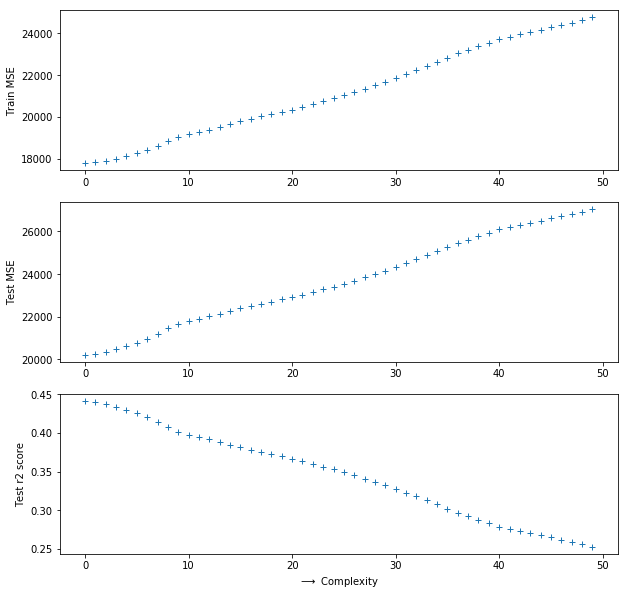

In [9]:
MSE_train=[]
MSE_test=[]
r2=[]
complexity=[]

for a in range(0,50,1):
    model=Lasso(alpha=a)
    model.fit(X_train,y_train)
    MSE_test.append(mean_squared_error(y_test, model.predict(X_test)))
    MSE_train.append(mean_squared_error(y_train, model.predict(X_train)))
    r2.append(r2_score(y_test, model.predict(X_test)))
    complexity.append(a)

fig, axs = plt.subplots(3,1,sharey=False,sharex=False,figsize=(10,10))


axs[2].set_xlabel("$\longrightarrow $ Complexity")

axs[0].set_ylabel('Train MSE')
axs[1].set_ylabel('Test MSE')
axs[2].set_ylabel('Test r2 score')

axs[0].plot(complexity[:400], MSE_train[:400], '+')
axs[1].plot(complexity[:400], MSE_test[:400],  '+')
axs[2].plot(complexity[:400], r2[:400],  '+')

In [10]:
# initialize
lasso_reg = Lasso(alpha=0)
lasso_reg.fit(X_train, y_train)
lasso_df = pd.DataFrame({'variable': df.drop('local_price',axis=1).columns})

alphas = np.arange(0, 50, 1)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    lasso_df['a='+str(alpha)] = lasso_reg.coef_
lasso_df.set_index('variable',inplace=True)
lasso_df.tail(10)

,a=0,a=1,a=2,a=3,a=4,a=5,a=6,a=7,a=8,a=9,...,a=40,a=41,a=42,a=43,a=44,a=45,a=46,a=47,a=48,a=49
variable,,,,,,,,,,,,,,,,,,,,,
Wifi,-0.107664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kitchen,-15.633428,-14.838991,-13.910000,-13.096797,-12.237507,-11.256538,-10.275562,-9.270310,-8.210495,-7.284587,...,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Breakfast,2.971542,1.979958,1.125258,0.234137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Essentials,-6.895087,-5.688724,-4.534007,-3.299711,-2.146514,-1.349262,-0.552003,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
available,31.893750,31.312595,30.607085,30.009828,29.501958,28.966224,28.430474,27.906796,27.410132,26.864061,...,0.104164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min_nights,-5.593212,-3.905034,-2.391916,-1.048272,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
week_number,-2.929606,-1.879789,-0.820571,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
entire_home,-6.736359,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
private_room,0.702993,6.503011,5.797568,5.230539,4.632144,4.017787,3.403465,2.797595,2.210838,1.476566,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


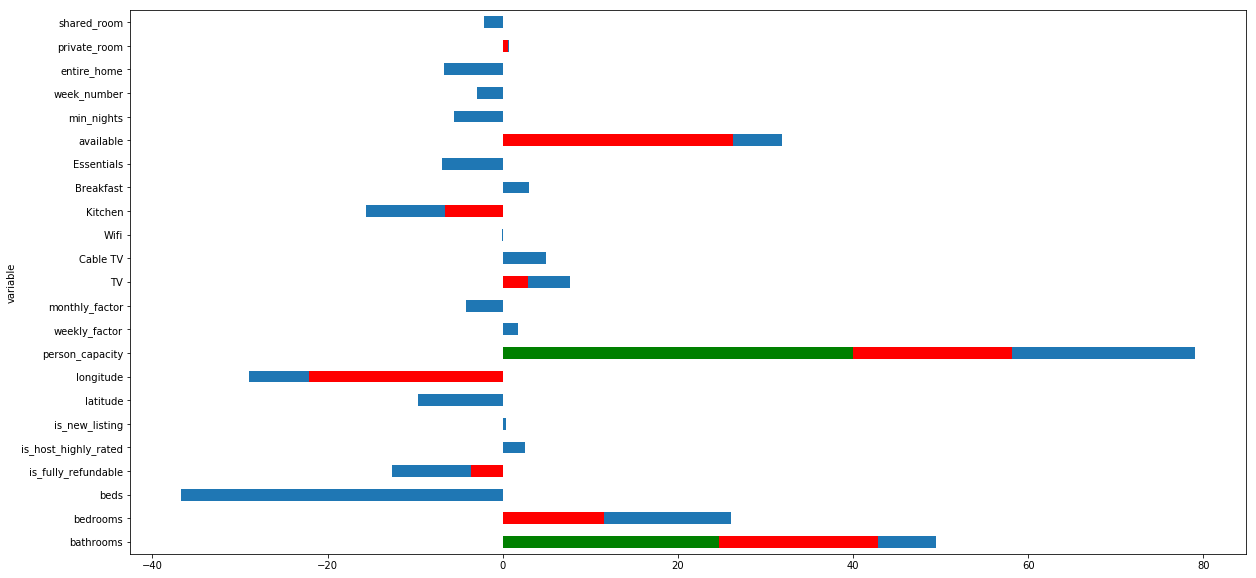

In [13]:
fig=plt.figure(figsize=(20,10))
lasso_df['a=0'].plot.barh()
lasso_df['a=10'].plot.barh(color='r')
lasso_df['a=49'].plot.barh(color='g')

In [15]:
lasso_df2=lasso_df.transpose()
lasso_df2['lambda']=lasso_df2.index
lasso_df2.reset_index(inplace=True)
lasso_df2.drop('index',axis=1,inplace=True)

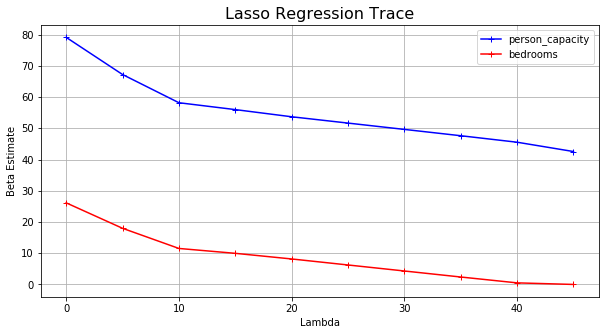

In [24]:
fig, ax = plt.subplots(figsize=(10, 5),sharex=False, sharey=False)
ax.plot(lasso_df2.person_capacity[::5],'b', lasso_df2.bedrooms[::5], 'r' ,marker='+')
#ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['person_capacity','bedrooms'])
ax.grid(True)

### Model Assessment

In [25]:
def r2(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=True)
    r2=[]
    
    for train_I, test_I in rkf.split(df):
        X_fold_train = scaler.fit_transform(df.iloc[train_I, :].drop('local_price',axis=1))
        y_fold_train = df['local_price'].values[train_I]
        X_fold_test = scaler.fit_transform(df.iloc[test_I, :].drop('local_price',axis=1))
        y_fold_test = df['local_price'].values[test_I]
        model = Lasso(alpha=50)
        model.fit(X_fold_train, y_fold_train)
        r2.append(r2_score(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the r2 score over the test distributions is:', "{:2.2f}%".format(np.mean(r2)*100), '$\u00B1 $', np.std(r2))
    print("The confidence interval is [{:2.1f}%, {:2.1f}%]".format(*np.quantile(r2, q=[0.025, 0.975]) * 100))
    
    return r2

The estimation of the r2 score over the test distributions is: 26.82% $± $ 0.013994375535886915
The confidence interval is [24.2%, 29.6%]


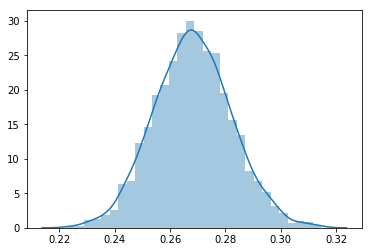

In [26]:
sns.distplot(r2(500),bins=30)

### Intepretability 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('local_price',axis=1), df.local_price, shuffle=True, train_size=0.8, random_state=42)

model=Lasso(alpha=50)
model.fit(scaler.fit_transform(X_train), y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
perm = PermutationImportance(model, random_state=1, n_iter=10).fit(scaler.fit_transform(X_test), y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1911 ± 0.0137,person_capacity
0.0884 ± 0.0082,bathrooms
0 ± 0.0000,is_fully_refundable
0 ± 0.0000,is_host_highly_rated
0 ± 0.0000,is_new_listing
0 ± 0.0000,latitude
0 ± 0.0000,longitude
0 ± 0.0000,weekly_factor
0 ± 0.0000,monthly_factor
0 ± 0.0000,min_nights
